Challenge Begins
---
<div class="alert alert-block alert-success">
As time flies, Now the time let us attend compettiion:

[Tbrain by Trend-Micro](https://tbrain.trendmicro.com.tw)  台灣 ETF 價格預測競賽

 <div class="alert alert-block alert-warning">
1. Huge data file: the way to read a data file, chunk by chunk,
```python
chunksize = 10 ** 6
for chunk in pd.read_csv(filename, chunksize=chunksize):
       process(chunk)
```    

<div style="font-size:1.4em;">
    
|序號|欄位|說明|
|-:|-:|-:|
|0|ETFid|ETF 代號|
| 1| Mon_ud | 周一漲跌 (1:漲, 0:平, -1:跌) 50% |
| 2| Mon_cprice| 周一收盤價 (權重 50%) |
| 3| Tue_ud | 周二漲跌 (1:漲, 0:平, -1:跌) 50% |
| 4| Tue_cprice| 周二收盤價 (權重 50%) |
| 5| Wed_ud | 周三漲跌 (1:漲, 0:平, -1:跌) 50% |
| 6| Wed_cprice| 周三收盤價 (權重 50%) |
| 7| Thu_ud | 周四漲跌 (1:漲, 0:平, -1:跌) 50% |
| 8| Thu_cprice| 周四收盤價 (權重 50%) |
| 9| Fri_ud | 周五漲跌 (1:漲, 0:平, -1:跌) 50% |
| 10| Fri_cprice| 周五收盤價 (權重 50%) |

</div>
<div class="alert alert-block alert-info">
Sample

```
ETFid,Mon_ud,Mon_cprice,Tue_ud,Tue_cprice,Wed_ud,Wed_cprice,Thu_ud,Thu_cprice,Fri_ud,Fri_cprice
0050,1,87.15,1,88.05,-1,88.00,-1,87.25,1,87.45
...
```

In [1]:
import numpy as np
from matplotlib import cm, pyplot as plt
import matplotlib.dates as dates
import pandas as pd
import datetime

from fbprophet import Prophet
from pandas_datareader import data as web
import datetime

import fix_yahoo_finance as yf
yf.pdr_override()


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import time
today=time.strftime("%Y-%m-%d")
today

'2018-04-29'

|code|ETF|code|ETF|
| ------| :------: | :------: |---|
|0050|元大台灣50|0058|富邦發達|
|0051|元大中型100 |0059|富邦金融|
|0052|富邦科技|006201|元大富櫃50|
|0053|元大電子|006203|元大MSCI台灣|
|0054|元大台商50|006204|永豐臺灣加權 |
|0055|元大MSCI金融|006208|富邦台50|
|0056|元大高股息|00690|兆豐藍籌30|
|0057|富邦摩台|00692|富邦臺灣公司治理100|
|00701|國泰臺灣低波動30|00713|元大台灣高息低波|

In [4]:
# manually define the name of ETF's
etfs=['0050','0051','0052','0053','0054','0055','0056','0057','0058',
      '0059','006201','006203','006204','006208','00690','00692','00701','00702']

In [ ]:
import os, sys

 <div class="alert alert-block alert-warning">
Create a new directory if not exists,
```python
import os
if os.path.exists("data"):
   print("exist")
else:
   os.mkdir("data")
```    

In [5]:
df0050_date=pd.read_csv("data/0050.csv",index_col='Date')

In [7]:
df0050_date=df0050_date.rename(columns={"代碼": "code", "日期": "date",'中文簡稱':'Name',"開盤價(元)":'Open',
                            "最高價(元)":'High',"最低價(元)":'Low',"收盤價(元)":'Close',"total":"Volume"});


In [8]:
df0050_date.head()

,code,date,Name,Open,High,Low,Close,Volume,weekday
Date,,,,,,,,,
2013-01-02,50,20130102,元大台灣50,46.57,47.13,46.49,46.92,16487.0,2
2013-01-03,50,20130103,元大台灣50,47.35,47.48,47.13,47.31,29020.0,3
2013-01-04,50,20130104,元大台灣50,47.31,47.31,46.92,47.00,9837.0,4
2013-01-07,50,20130107,元大台灣50,47.05,47.05,46.49,46.79,8910.0,0
2013-01-08,50,20130108,元大台灣50,46.57,46.75,46.27,46.49,12507.0,1


In [22]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

FaceBook Prophet Introduction
---
One of most prediction package recently for time-series, especially for economical data; it acclaims:
1. simple, only 'ds' and 'y', date and observers quantity, are required;
- as usual usual, claim the model, training and predict. 

You should admire this for its compactness!

In [32]:
from fbprophet import Prophet

In [29]:
#dffb=pd.DataFrame({'ds':pd.to_datetime(df0050_date.index),'y':df0050_date['Close']})
dffb=pd.DataFrame()

In [32]:
dffb['y'] = df0050_date['Close']
dffb['ds'] = pd.to_datetime(df0050_date.index)



In [57]:
dffb.index=pd.to_datetime(dffb.index)

In [58]:
dffb.head()

,y,ds
Date,,
2013-01-02,46.92,2013-01-02
2013-01-03,47.31,2013-01-03
2013-01-04,47.00,2013-01-04
2013-01-07,46.79,2013-01-07
2013-01-08,46.49,2013-01-08


Modeling Prediction
---
```
Prophet(growth='linear', changepoints=None, n_changepoints=25, yearly_seasonality='auto',
        weekly_seasonality='auto', daily_seasonality='auto', holidays=None, 
        seasonality_prior_scale=10.0, holidays_prior_scale=10.0, 
        changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
```
- Input ```df.ds, df.y```: datetime and data we want to predict, define them if none;
- Output ```df.yhat, df.yhat_upper, df.yhat_lower```: 80% CI's

In [41]:
s={'changepoint_prior_scale':  0.05, 'weekly_seasonality' : False,
    'daily_seasonality': False,'monthly_seasonality': True,
    'yearly_seasonality': True,'changepoints': None}

In [43]:
#model = Prophet(mcmc_samples=500)
model = Prophet(daily_seasonality=s['daily_seasonality'],weekly_seasonality=s['weekly_seasonality'], 
                                  yearly_seasonality=s['yearly_seasonality'],
                                  changepoint_prior_scale=s['changepoint_prior_scale'],
                                  changepoints=s['changepoints'])
model.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)

In [ ]:
model.fit(dffb);

In [44]:
future = model.make_future_dataframe(periods=7)
future[-14:]

,ds
1279,2018-03-23
1280,2018-03-26
1281,2018-03-27
1282,2018-03-28
1283,2018-03-29
1284,2018-03-30
1285,2018-03-31
1286,2018-04-01
1287,2018-04-02
1288,2018-04-03


In [47]:
forecast = model.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(14)

,ds,yhat,yhat_lower,yhat_upper
1279,2018-03-23,84.195038,82.681881,85.665293
1280,2018-03-26,84.437676,82.943618,86.148982
1281,2018-03-27,84.384590,82.936702,85.865438
1282,2018-03-28,84.299058,82.833029,85.882208
1283,2018-03-29,84.257568,82.706303,85.722208
1284,2018-03-30,84.302503,82.610994,85.732350
1285,2018-03-31,84.412630,82.934051,85.968528
1286,2018-04-01,84.524973,82.986628,85.993549
1287,2018-04-02,84.585927,83.046101,85.999079
1288,2018-04-03,84.587514,83.125290,86.170804


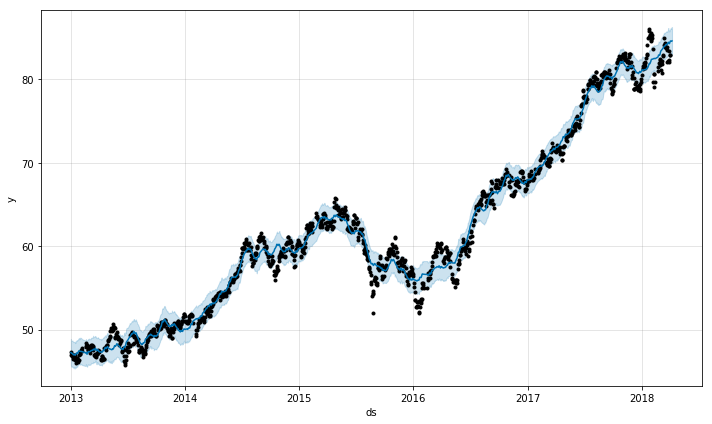

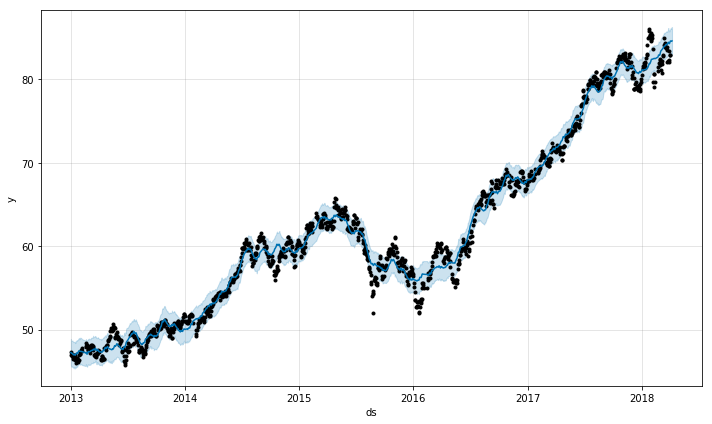

In [68]:
model.plot(forecast)

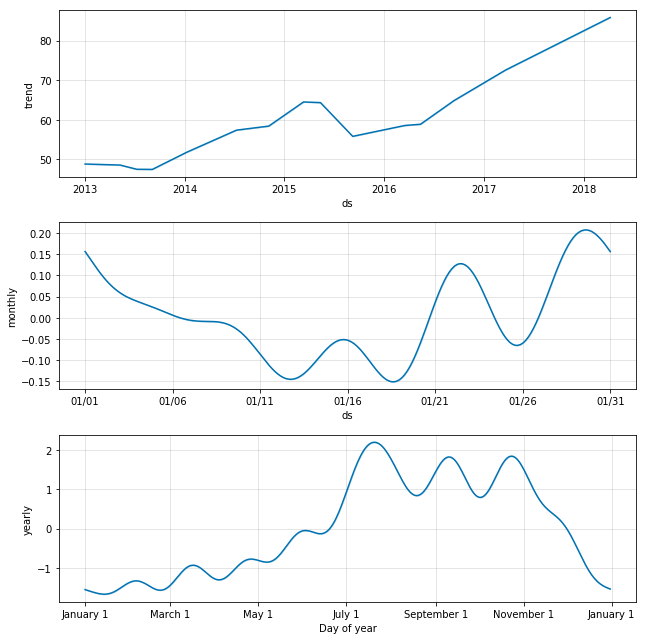

In [66]:
model.plot_components(forecast)
plt.show()

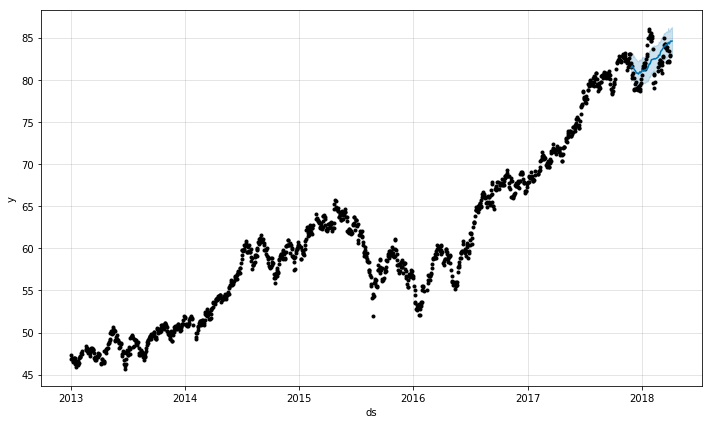

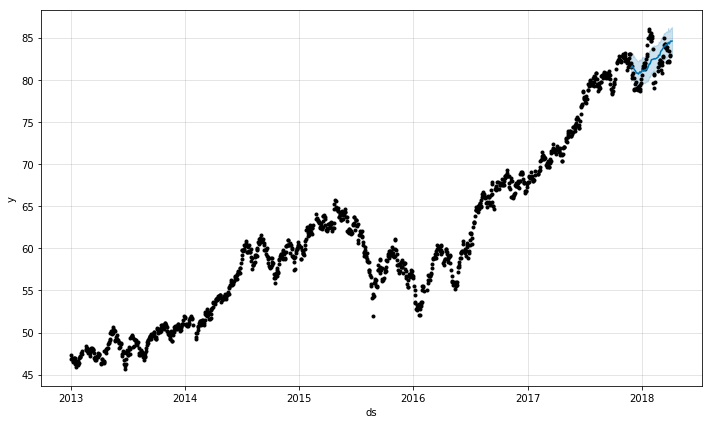

In [62]:
obs=forecast[-90:]
model.plot(obs)

In [50]:
fb=forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']][-21:-7]

(80, 85)

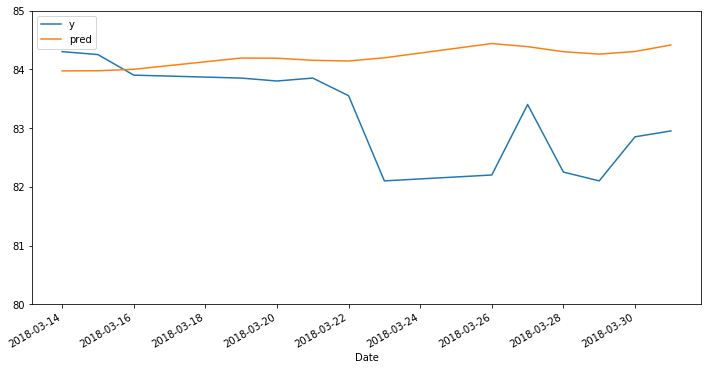

In [61]:
plt.figure(figsize=(12,6))
dffb.y[-14:].plot()
plt.plot(fb.ds,fb.yhat,label='pred')
plt.legend()
plt.ylim(80,85)

In [69]:
df_pred=forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']][-7:]

In [74]:
df_pred['weekday']=df_pred.ds.dt.weekday_name

In [97]:
df_pred['yhat']=round(df_pred.yhat,2)

In [ ]:
etfs=['0050','0051','0052','0053','0054','0055','0056','0057','0058',
      '0059','006201','006203','006204','006208','00690','00692','00701','00702']

In [79]:
indexs=df_pred['ds'][1:-1]

In [143]:
index=df_pred['ds'][1:-1]
columns = ['ETFid','Mon_ud','Mon_cprice','Tue_ud','Tue_cprice','Wed_ud','Wed_cprice',
           'Thu_ud','Thu_cprice','Fri_ud','Fri_cprice']

dfs= pd.DataFrame(columns=columns)
#dfs= pd.DataFrame(index=etfs, columns=columns)
# Fill zero's rater than Nan 
#dfs = dfs.fillna(0)

In [144]:
dfs

,ETFid,Mon_ud,Mon_cprice,Tue_ud,Tue_cprice,Wed_ud,Wed_cprice,Thu_ud,Thu_cprice,Fri_ud,Fri_cprice


In [110]:
# 
df_pred['yesterday_close'] = df0050_date.Close[-1:].values[0]
#df_pred['yesterday_close'][0]=df0050_date.Close[-1:]
df_pred['yesterday_close'][1:] = df_pred['yhat'][:-1]
df_pred['price_change'] = df_pred['yhat'] - df_pred['yesterday_close']
df_pred['sign'] = np.sign(df_pred['price_change']).astype('int')

In [111]:
df_pred

,ds,yhat,yhat_lower,yhat_upper,weekday,yesterday_close,price_change,sign
1286,2018-04-01,84.52,82.986628,85.993549,Sunday,82.95,1.57,1
1287,2018-04-02,84.59,83.046101,85.999079,Monday,84.52,0.07,1
1288,2018-04-03,84.59,83.125290,86.170804,Tuesday,84.59,0.00,0
1289,2018-04-04,84.56,83.005481,86.060384,Wednesday,84.59,-0.03,-1
1290,2018-04-05,84.55,82.897046,86.199760,Thursday,84.56,-0.01,-1
1291,2018-04-06,84.56,83.075270,86.075947,Friday,84.55,0.01,1
1292,2018-04-07,84.59,83.002020,86.263235,Saturday,84.56,0.03,1


In [ ]:
for etfs0 in etfs0s:
    a=df_pred.sign[1:-1].values
    b=df_pred.yhat[1:-1].values
    record=[etfs0]
    for i in range(len(a)):
        record.append(a[i])
        record.append(b[i])
    print(record)    

In [141]:
# insert the final result in defaulted format
dfs.loc[0]=record

In [142]:
dfs

,ETFid,Mon_ud,Mon_cprice,Tue_ud,Tue_cprice,Wed_ud,Wed_cprice,Thu_ud,Thu_cprice,Fri_ud,Fri_cprice
0,0050,1,84.59,0,84.59,-1,84.56,-1,84.55,1,84.56


Last Note
---
- Here, we shows how to create the result for id=`0050`. You can create the function in which load all the data, create fbprophet model, fit, etc. After completing work, write all the data into dfs as asked.
- Next week, append the last true data into old df and re-do the above work.
- <font color="red">Check the result with the exact data after while</font>.

How about the prediction, good or bad?
---

In [12]:
import pandas as pd
import time
from pandas_datareader import data as web
import numpy as np
import fix_yahoo_finance as yf
yf.pdr_override()

In [17]:
ETF1 = "0050.TW"

END_DATE='2018-04-024'
START_DATE = '2018-03-30'

In [10]:
df_ETF1 = web.get_data_yahoo(ETF1,START_DATE,END_DATE)
df_ETF1

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-30,82.650002,83.050003,82.650002,82.849998,82.849998,4994090
2018-04-02,82.849998,82.949997,82.150002,82.250000,82.250000,3737299
2018-04-03,81.500000,81.550003,81.199997,81.500000,81.500000,6187523


In [23]:
df_ETF1['yesterday_close'] = 0
#df_pred['yesterday_close'][0]=df0050_date.Close[-1:]
df_ETF1['yesterday_close'][1:] = round(df_ETF1['Close'][:-1],2)
df_ETF1['Close'] =round(df_ETF1['Close'] ,2)
df_ETF1['price_change'] = df_ETF1['Close'] - df_ETF1['yesterday_close']
df_ETF1['price_change']=round(df_ETF1['price_change'],2)
df_ETF1['sign'] = np.sign(df_ETF1['price_change']).astype('int')

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
df_ETF1[1:]

,Open,High,Low,Close,Adj Close,Volume,yesterday_close,price_change,sign
Date,,,,,,,,,
2018-04-02,82.849998,82.949997,82.150002,82.25,82.25,3737299,82.85,-0.60,-1
2018-04-03,81.500000,81.550003,81.199997,81.50,81.50,6187523,82.25,-0.75,-1


In [37]:
END_DATE='2018-04-29'
START_DATE = '2018-04-01'

In [6]:
# manually define the name of ETF's
etfs_1=['0050.TW','0051.TW','0052.TW','0053.TW','0054.TW','0055.TW','0056.TW','0057.TW','0058.TW',
      '0059.TW','006201.TWO','006203.TW','006204.TW','006208.TW','00690.TW','00692.TW','00701.TW','00713.TW']

In [38]:
# manually define the name of ETF's
etfs_1=['0050.TW','0051.TW','0052.TW','0053.TW','0054.TW','0055.TW','0056.TW','0057.TW','0058.TW',
      '0059.TW','006203.TW','006204.TW','006208.TW','00690.TW','00701.TW','00713.TW']

In [44]:
df_mining=web.get_data_yahoo(etfs_1[-1],START_DATE,END_DATE)

[*********************100%***********************]  1 of 1 downloaded


In [41]:
def get_stock(id):
    df=pd.DataFrame()
    filename=('yahoo/20180424/%s.csv' %id[:-3])
    df=web.get_data_yahoo(id,START_DATE,END_DATE)
    #df['Adj Close']=round(df_mining['Adj Close'],2)
    df.rename({'Adj Close':'Close'})
    df['Volume']=round(df['Volume']/1000)
    df = df.drop('Adj Close', 1)
    df['Date']=df.index
    df.to_csv(filename,index=False)

In [46]:
etfs_1[-1:]

['00713.TW']

In [47]:
for etfs0 in etfs_1:
    get_stock(etfs0)

[*********************100%***********************]  1 of 1 downloaded


In [99]:
df_mining=web.get_data_yahoo('006201.TWO','2018-03-30','2018-04-24')

[*********************100%***********************]  1 of 1 downloaded


In [100]:
df_mining

""


Use [證券櫃檯買賣中心](http://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43.php?l=zh-tw) if historic data can not be downloaded, for instance,  006201

[00692](http://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html)

Manually modify
---
1. load from office, for instance Libreoffice, by encoding big5, and save as csv again.
2. load within Jupyter notebook to manipulate.

In [27]:
df1= pd.read_csv('data1/0050.csv',index_col='Date')

In [28]:
df1.head()

,code,date,Name,Open,High,Low,Close,Volume,weekday,yesterday_close,yesterday_volume,price_change,volume_change,sign
Date,,,,,,,,,,,,,,
2013-01-02,50,20130102,元大台灣50,46.57,47.13,46.49,46.92,16487.0,2,0.00,0.0,46.92,16487.0,1
2013-01-03,50,20130103,元大台灣50,47.35,47.48,47.13,47.31,29020.0,3,46.92,16487.0,0.39,12533.0,1
2013-01-04,50,20130104,元大台灣50,47.31,47.31,46.92,47.00,9837.0,4,47.31,29020.0,-0.31,-19183.0,-1
2013-01-07,50,20130107,元大台灣50,47.05,47.05,46.49,46.79,8910.0,0,47.00,9837.0,-0.21,-927.0,-1
2013-01-08,50,20130108,元大台灣50,46.57,46.75,46.27,46.49,12507.0,1,46.79,8910.0,-0.30,3597.0,-1


In [58]:
def df_update():
    for ind in etfs_1:
        ind_tmp1='data1/%s.csv' %ind[:-3]
        ind_tmp2='yahoo/20180424/%s.csv' %ind[:-3]
        df1= pd.read_csv(ind_tmp1,index_col='Date')
        df2= pd.read_csv(ind_tmp2,index_col='Date')
        #print(len(df1))
        res = pd.concat([df1, df2]).copy()
        #print(res.tail(2))
        res=res.fillna(0)
        df_concat(res,code=ind[:-3])
        print('Processing id = %s completed ...' %ind[:-3])

In [59]:
df_update()

Processing id = 0050 completed ...
Processing id = 0051 completed ...
Processing id = 0052 completed ...
Processing id = 0053 completed ...
Processing id = 0054 completed ...
Processing id = 0055 completed ...
Processing id = 0056 completed ...
Processing id = 0057 completed ...
Processing id = 0058 completed ...
Processing id = 0059 completed ...
Processing id = 006203 completed ...
Processing id = 006204 completed ...
Processing id = 006208 completed ...
Processing id = 00690 completed ...
Processing id = 00701 completed ...
Processing id = 00713 completed ...


In [29]:
df2= pd.read_csv('yahoo/20180424/0050.csv',index_col='Date')

In [30]:
res = pd.concat([df1, df2])

In [31]:
res=res.fillna(0)

In [56]:
def df_concat(df,code='0050'):
    """
    Clean Concat dataframe
    """
    # round floating with 2-decimals, for Close,Low,High,Open
    df['Close']=round(df['Close'],2)
    df['High']=round(df['High'],2)
    df['Low']=round(df['Low'],2)
    df['Open']=round(df['Open'],2)
    
    # keep name with wgitespace striped
    df['Name']=df['Name'][0:1].values[0].strip()

    # Convert volume into integer
    df['Volume']=df['Volume'].astype(int)
    
    # convert code into integer 
    #code=res['code'][0:1].values[0].astype(int)
    #code=code.astype(int)
    df['code']=code
    
    # convert Datetime into integer and create new Date column
    df['date']=pd.to_datetime(df.index).strftime('%Y%m%d')
    df['Date']=df.index
    
    # splite datestamp into year,month,day
    df['dat']=pd.to_datetime(df.index)
    df['year']=df['dat'].dt.year
    df['month']=df['dat'].dt.month
    df['day']=df['dat'].dt.day
    
    df1=df[['Date','date','Name','code','Open','High','Low','Close','Volume','year','month','day']]
    name='yahoo/update/%s.csv' %code
    df1.to_csv(name,index=False)


In [32]:
df_concat(res)

In [5]:
!mkdir yahoo/update

00692 Concat
---

In [82]:
df1_00692= pd.read_csv('data1/00692.csv',index_col='Date')

In [61]:
df1_00692.tail(2)

,code,date,Name,Open,High,Low,Close,Volume,weekday,yesterday_close,yesterday_volume,price_change,volume_change,sign
Date,,,,,,,,,,,,,,
2018-03-30,692,20180330,富邦公司治理,21.53,21.67,21.53,21.64,569.0,4,21.51,586.0,0.13,-17.0,1
2018-03-31,692,20180331,富邦公司治理,21.65,21.65,21.63,21.65,511.0,5,21.64,569.0,0.01,-58.0,1


In [73]:
df2_00692= pd.read_csv('yahoo/20180424/00692.csv',index_col='Date')


,Volume,成交金額,Open,High,Low,Close,漲跌價差,成交筆數
Date,,,,,,,,
2018-04-26,1265163,26358453,20.98,20.98,20.74,20.78,-0.16,532
2018-04-27,811166,16865470,20.88,20.88,20.76,20.84,0.06,235


In [77]:
df2_00692['Volume']=round(df2_00692.Volume/1000).astype(int)

In [78]:
df2_00692.tail(2)

,Volume,成交金額,Open,High,Low,Close,漲跌價差,成交筆數
Date,,,,,,,,
2018-04-26,1265,26358453,20.98,20.98,20.74,20.78,-0.16,532
2018-04-27,811,16865470,20.88,20.88,20.76,20.84,0.06,235


In [79]:
df2_00692_1=df2_00692[['Volume','Open','High','Low','Close']]

In [80]:
df2_00692_1.tail(2)

,Volume,Open,High,Low,Close
Date,,,,,
2018-04-26,1265,20.98,20.98,20.74,20.78
2018-04-27,811,20.88,20.88,20.76,20.84


In [83]:
res = pd.concat([df1_00692, df2_00692_1])

In [84]:
res=res.fillna(0)

In [85]:
df_concat(res,code='00692')

006201 Concat
---

In [86]:
df1_006201= pd.read_csv('data1/006201.csv',index_col='Date')

In [87]:
df2_006201= pd.read_csv('yahoo/20180424/006201.csv',index_col='Date')

In [88]:
df2_006201_1=df2_006201[['Volume','Open','High','Low','Close']]

In [89]:
res = pd.concat([df1_006201, df2_006201_1])

In [90]:
res=res.fillna(0)

In [91]:
df_concat(res,code='006201')

Prediction by ML
---
Making Predictio by fbprophet only requires one date, we want to survey, with time; simplicy is alike Linear Regression scheme. However, data comes not only  involving historic data but more concerned factors. Explore more factors should get better prediction. Furthermore, the predicted column is dependent on other columns; to predict the data always requires 
other columns but also lack as same as column which we want to predict.

Thus, we integrate the way to make a scheme to make prediction:
1. use grey-box alogrithm to generate the data, predict column with others, in the future.
- use general ML scheme, (Decision Tree, random forest, Gradient Boost Method, xgboost, Neural Network scheme, etc) to make predition.  